In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [4]:
'''
==============================
Data Cleaning
==============================
Notes:
N/A
'''
# Colomn names were provided in the data overview but not added to the data itself, need to add them
col_names = ["Sample code number", "Clump Thickness (1-10)", "Uniformity of Cell Size (1-10)", "Uniformity of Cell Shape (1-10)", "Marginal Adhesion (1-10)", "Single Epithelial Cell Size (1-10)", "Bare Nuclei (1-10)",
           "Bland Chromatin (1-10)", "Normal Nucleoli (1-10)", "Mitoses (1-10)", "Class (2 for benign, 4 for malignant)"]

# Change file path as needed
data1 = pd.read_csv("breast-cancer-wisconsin.data", names=col_names)

# values present in that datatype
data1.info()
# Looking at the Dtype for the 
# object data type inside of BareNuclei tells us that there are string or null

# Check for  Null or NaN values, None were found
data1.isnull().sum()
data1.isna().sum()

# By manualling scanning the dataset we discovered some instances where a question mark was used instead of a value
bare_nuc_missing = data1.loc[data1['Bare Nuclei (1-10)'] == '?']
missing_values = bare_nuc_missing.index.tolist()

# Create a new dataset without the invalid data
data_cleaned = data1.drop(index=missing_values)
data_cleaned.info()

# Convert data to int64 now that the column is all of type integer
data_cleaned['Bare Nuclei (1-10)'] = data_cleaned['Bare Nuclei (1-10)'].astype(np.int64)
data_cleaned.info()

# Malignant/Benign is currently represented with 2 and 4, changing it to be 1 and 2
data_cleaned['Class (2 for benign, 4 for malignant)'] = data_cleaned['Class (2 for benign, 4 for malignant)'].map({2: 0, 4: 1})


#Remove duplicates from data frame
sample_code = data_cleaned["Sample code number"]
data_cleaned[data_cleaned.isin(data_cleaned[data_cleaned.duplicated()])].sort_values("Sample code number")

# Check state of data after dropping duplicates
data_cleaned = data_cleaned.drop_duplicates(subset='Sample code number', keep=False, inplace=False).reset_index(drop=True)
#data_cleaned

# Remove sample code as its no longer needed
removedSampleCodeData = data_cleaned.drop('Sample code number', axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Sample code number                     699 non-null    int64 
 1   Clump Thickness (1-10)                 699 non-null    int64 
 2   Uniformity of Cell Size (1-10)         699 non-null    int64 
 3   Uniformity of Cell Shape (1-10)        699 non-null    int64 
 4   Marginal Adhesion (1-10)               699 non-null    int64 
 5   Single Epithelial Cell Size (1-10)     699 non-null    int64 
 6   Bare Nuclei (1-10)                     699 non-null    object
 7   Bland Chromatin (1-10)                 699 non-null    int64 
 8   Normal Nucleoli (1-10)                 699 non-null    int64 
 9   Mitoses (1-10)                         699 non-null    int64 
 10  Class (2 for benign, 4 for malignant)  699 non-null    int64 
dtypes: int64(10), objec

In [5]:
'''
==============================
Data Preperation
==============================
Notes:
Split the data into training and testing data
'''

# New colomn names without sample number
col_names2 =  ["Clump Thickness (1-10)", "Uniformity of Cell Size (1-10)", "Uniformity of Cell Shape (1-10)", "Marginal Adhesion (1-10)", "Single Epithelial Cell Size (1-10)", "Bare Nuclei (1-10)",
           "Bland Chromatin (1-10)", "Normal Nucleoli (1-10)", "Mitoses (1-10)"]
x = data_cleaned[col_names2]
y = data_cleaned["Class (2 for benign, 4 for malignant)"]

# Train_test_split from sklearn splits arrays or matrices into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)



Optimal K Value: 9
KNN (k=3) accuracy: 0.9658 %
KNN (k=3) Mean Squared Error: 0.0342
KNN (k=5) accuracy: 0.9744 %
KNN (k=5) Mean Squared Error: 0.0256
KNN (k=9) accuracy: 0.9573 %
KNN (k=9) Mean Squared Error: 0.0427


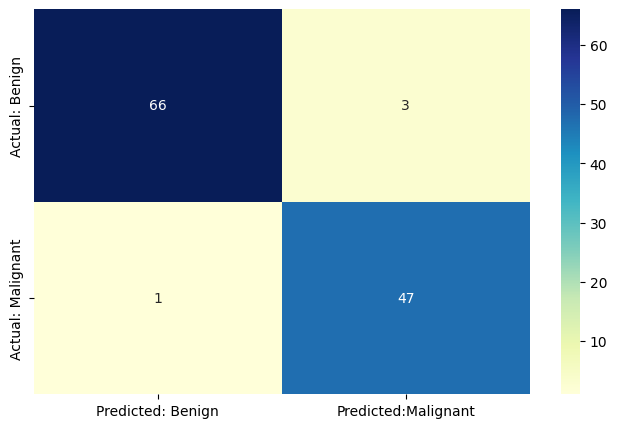

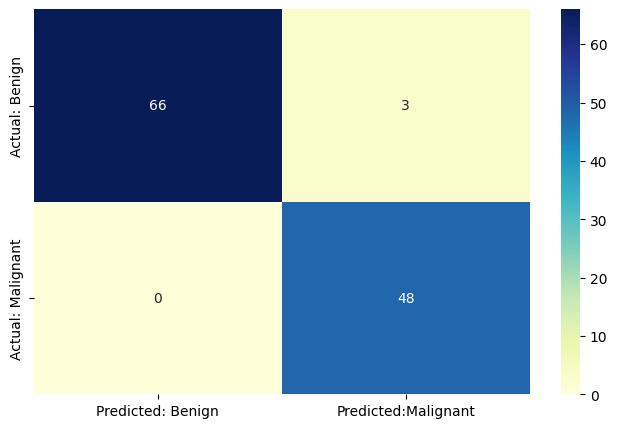

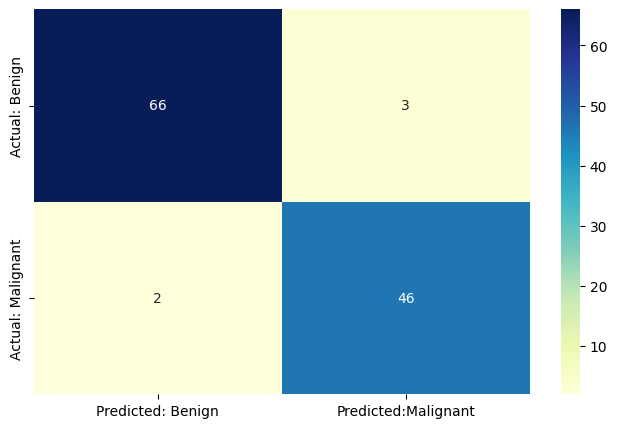

In [6]:


"""
==============================
Model 1: K Nearest Neighbour Clustering
Notes: the code below will try several different k values for 50 unique test/train splits. 
For each test/train split, it will choose an optimal value for k by choosing the value that results in the lowest mean square error. 
It then chooses the average of all of the optimal k values for each test/train split, and chooses that as the overall optimal k value.
==============================
"""

x_col_names = ["Clump Thickness (1-10)", "Uniformity of Cell Size (1-10)", "Uniformity of Cell Shape (1-10)",
               "Marginal Adhesion (1-10)", "Single Epithelial Cell Size (1-10)", "Bare Nuclei (1-10)",
               "Bland Chromatin (1-10)", "Normal Nucleoli (1-10)", "Mitoses (1-10)"]

x = data_cleaned[x_col_names]
y = data_cleaned["Class (2 for benign, 4 for malignant)"]

# Initializing variables to track optimal k and minimum error
optimal_k = 0
minimum_error = 10000

for k in range(1, 51, 2):
    k_errors = []  # To store errors for different splits with the same k value
    for i in range(50):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error = mean_squared_error(y_test, y_pred)
        k_errors.append(error)

    avg_error = sum(k_errors) / len(k_errors)
    if avg_error < minimum_error:
        minimum_error = avg_error
        optimal_k = k

# Output the determined optimal K value
print("Optimal K Value:", optimal_k)

# Output from multiple runs: 5, 9, 5, 13, 5, 5, 3, 5, 5, 5

# Test KNN with min, max, mean (3, 5, 9)

# KNN with k=3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
KNeighborsClassifier(3)
y_pred = knn.predict(x_test)
accuracy = knn.score(x_test, y_test)

print("KNN (k=3) accuracy: %.4f" % accuracy, "%")


cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted: Benign','Predicted:Malignant'],index=['Actual: Benign','Actual: Malignant'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

knn3_mse = mean_squared_error(y_test,y_pred)
print("KNN (k=3) Mean Squared Error: %.4f" % knn3_mse)

# KNN with k=5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
KNeighborsClassifier(5)
y_pred = knn.predict(x_test)
accuracy = knn.score(x_test, y_test)
print("KNN (k=5) accuracy: %.4f" % accuracy, "%")

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted: Benign','Predicted:Malignant'],index=['Actual: Benign','Actual: Malignant'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

knn5_mse = mean_squared_error(y_test,y_pred)
print("KNN (k=5) Mean Squared Error: %.4f" % knn5_mse)


# KNN with k=9
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train,y_train)
KNeighborsClassifier(7)
y_pred = knn.predict(x_test)
accuracy = knn.score(x_test, y_test)

print("KNN (k=9) accuracy: %.4f" % accuracy, "%")


cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted: Benign','Predicted:Malignant'],index=['Actual: Benign','Actual: Malignant'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

knn9_mse = mean_squared_error(y_test,y_pred)
print("KNN (k=9) Mean Squared Error: %.4f" % knn9_mse)




Decision Tree Classifier accuracy:  94.01709401709401 % accurate
Decision Tree Classifier Mean Squared Error:  0.05982905982905983


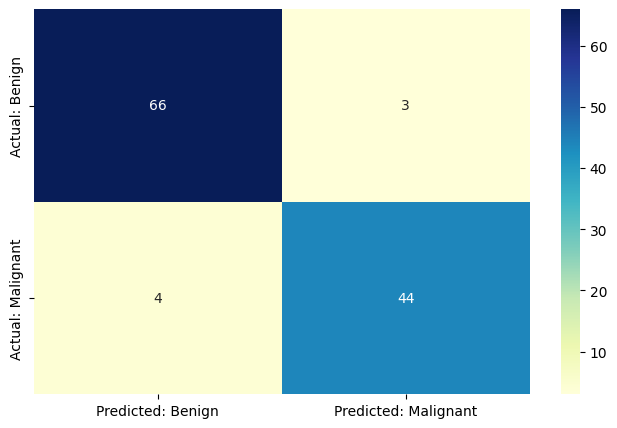

In [7]:

"""
==============================
Model 2: Decision Tree Classifier
==============================
"""

# Apply Decision Tree Classifier to training and test
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)

# Decision Tree Classifier Results
score2 = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier accuracy: ", score2*100, "% accurate")

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted: Benign', 'Predicted: Malignant'],
                           index=['Actual: Benign', 'Actual: Malignant'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

dt_classifier_mse = mean_squared_error(y_test, y_pred)
print("Decision Tree Classifier Mean Squared Error: ", dt_classifier_mse)


Logistic Regression accuracy:  96.58119658119658 % accurate
Logistic Regression Mean Squared Error:  0.03418803418803419


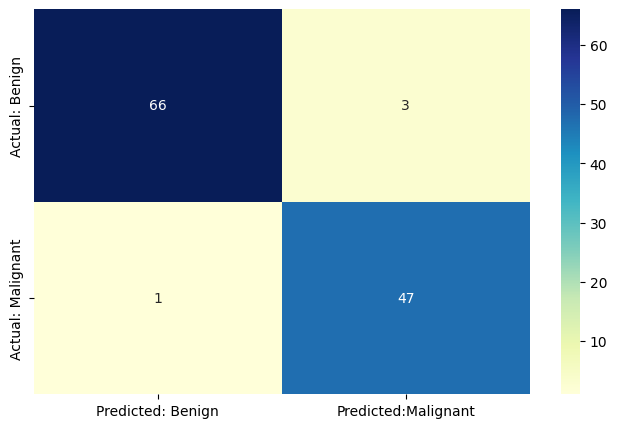

In [8]:

"""
==============================
Model 3: Logistic Regression
==============================
"""

# Apply Logistic Regression to training and test
logreg=LogisticRegression(penalty = 'l2')
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

# Logistic Regression Results
score1 = accuracy_score(y_test,y_pred)
print("Logistic Regression accuracy: ", score1*100, "% accurate")
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted: Benign','Predicted:Malignant'],index=['Actual: Benign','Actual: Malignant'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
logreg_mse = mean_squared_error(y_test,y_pred)
print("Logistic Regression Mean Squared Error: ", logreg_mse)